In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df = pd .read_csv('5000 Sales Records (new) (1).csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48


In [4]:
df.columns


Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost'],
      dtype='object')

In [5]:
# To get the profit
df['Profit'] = df['Total Revenue'] - df['Total Cost']

In [156]:
# To display the first few rows of my DataFrame
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Profit,days to ship,Profit Margin
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,2013-12-20,957081544,2014-01-11,552,255.28,159.42,140914.56,87999.84,52914.72,22,37.550924
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2010-07-05,301644504,2010-07-26,2167,152.58,97.44,330640.86,211152.48,119488.38,21,36.138419
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030,2011-09-29,4778,47.45,31.79,226716.10,151892.62,74823.48,17,33.003161
3,Asia,North Korea,Cereal,Offline,L,2010-05-13,892599952,2010-06-15,9016,205.70,117.11,1854591.20,1055863.76,798727.44,33,43.067574
4,Asia,Sri Lanka,Snacks,Offline,C,2015-07-20,571902596,2015-07-27,7542,152.58,97.44,1150758.36,734892.48,415865.88,7,36.138419


# To get the item type with the most profit

In [49]:
most_profitable_item = df.groupby('Item Type')[['Profit']].sum().sort_values(by= 'Profit',ascending = False).reset_index(drop = False)
most_profitable_item

,Item Type,Profit
0,Cosmetics,3.724137e+08
1,Household,3.479067e+08
2,Office Supplies,2.660880e+08
3,Baby Food,2.180739e+08
4,Cereal,1.727152e+08
5,Clothes,1.456642e+08
6,Vegetables,1.319625e+08
7,Meat,1.087485e+08
8,Snacks,1.059281e+08
9,Personal Care,5.350047e+07


# Visualizing the item type that made the most profit 

In [43]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Profit', 'days to ship',
       'Profit Margin'],
      dtype='object')

In [48]:
most_profitable_item.columns


Index(['Profit'], dtype='object')

In [144]:
plt.style.use('seaborn-v0_8-dark')

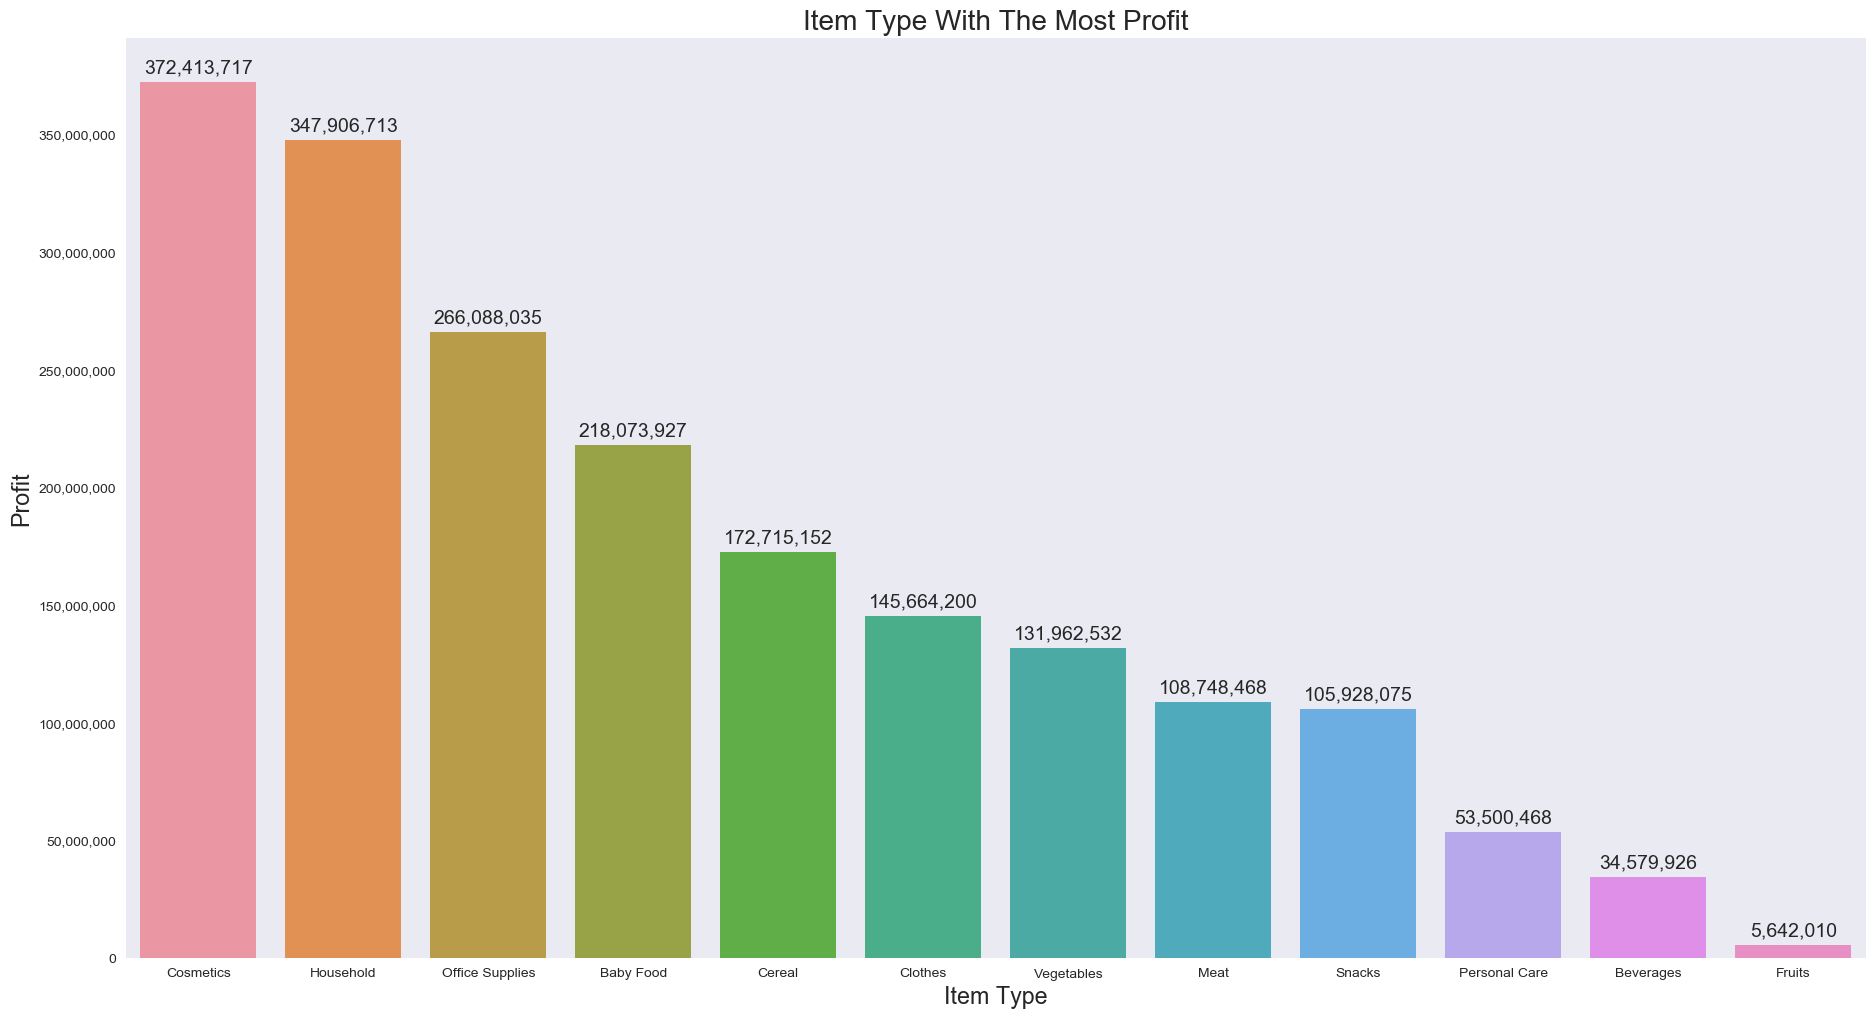

In [148]:
import matplotlib.ticker as ticker
import locale

# Set the locale for formatting
locale.setlocale(locale.LC_ALL, '')

plt.figure(figsize=(20, 10))
ax = sns.barplot(x= 'Item Type', y='Profit', data=most_profitable_item, order=most_profitable_item['Item Type'].value_counts().index)
plt.title('Item Type With The Most Profit')

# Format the profit labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: locale.format_string('%d', x, grouping=True)))

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(locale.format_string('%d', p.get_height(), grouping=True), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# To get the number of days it took to ship the item

In [8]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Profit            float64
dtype: object

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Therefore to get the number of days to ship the item 

In [10]:
df['days to ship'] = (df['Ship Date']- df['Order Date']).dt.days
df['days to ship']

0       22
1       21
2       17
3       33
4        7
        ..
4995    17
4996    46
4997    17
4998    19
4999    30
Name: days to ship, Length: 5000, dtype: int64

In [157]:
# To get the average Shipping day
average_shipping_day = df['days to ship'].mean()
average_shipping_day

25.0458

# To get the region that made the most profit 

In [54]:
# To group the regions by profit, starting with the highest and ending with the lowest.
region_with_the_most_profit = df.groupby('Region')[['Profit']].sum().sort_values(by = 'Profit', ascending = False).reset_index(drop = False )
region_with_the_most_profit

,Region,Profit
0,Sub-Saharan Africa,5.311423e+08
1,Europe,5.016760e+08
2,Asia,2.782377e+08
3,Middle East and North Africa,2.313803e+08
4,Central America and the Caribbean,2.046120e+08
5,Australia and Oceania,1.749346e+08
6,North America,4.124040e+07


In [55]:
region_with_the_most_profit.columns

Index(['Region', 'Profit'], dtype='object')

# Visualizing the region that made the most profit

In [142]:
plt.style.use('seaborn-v0_8-dark')

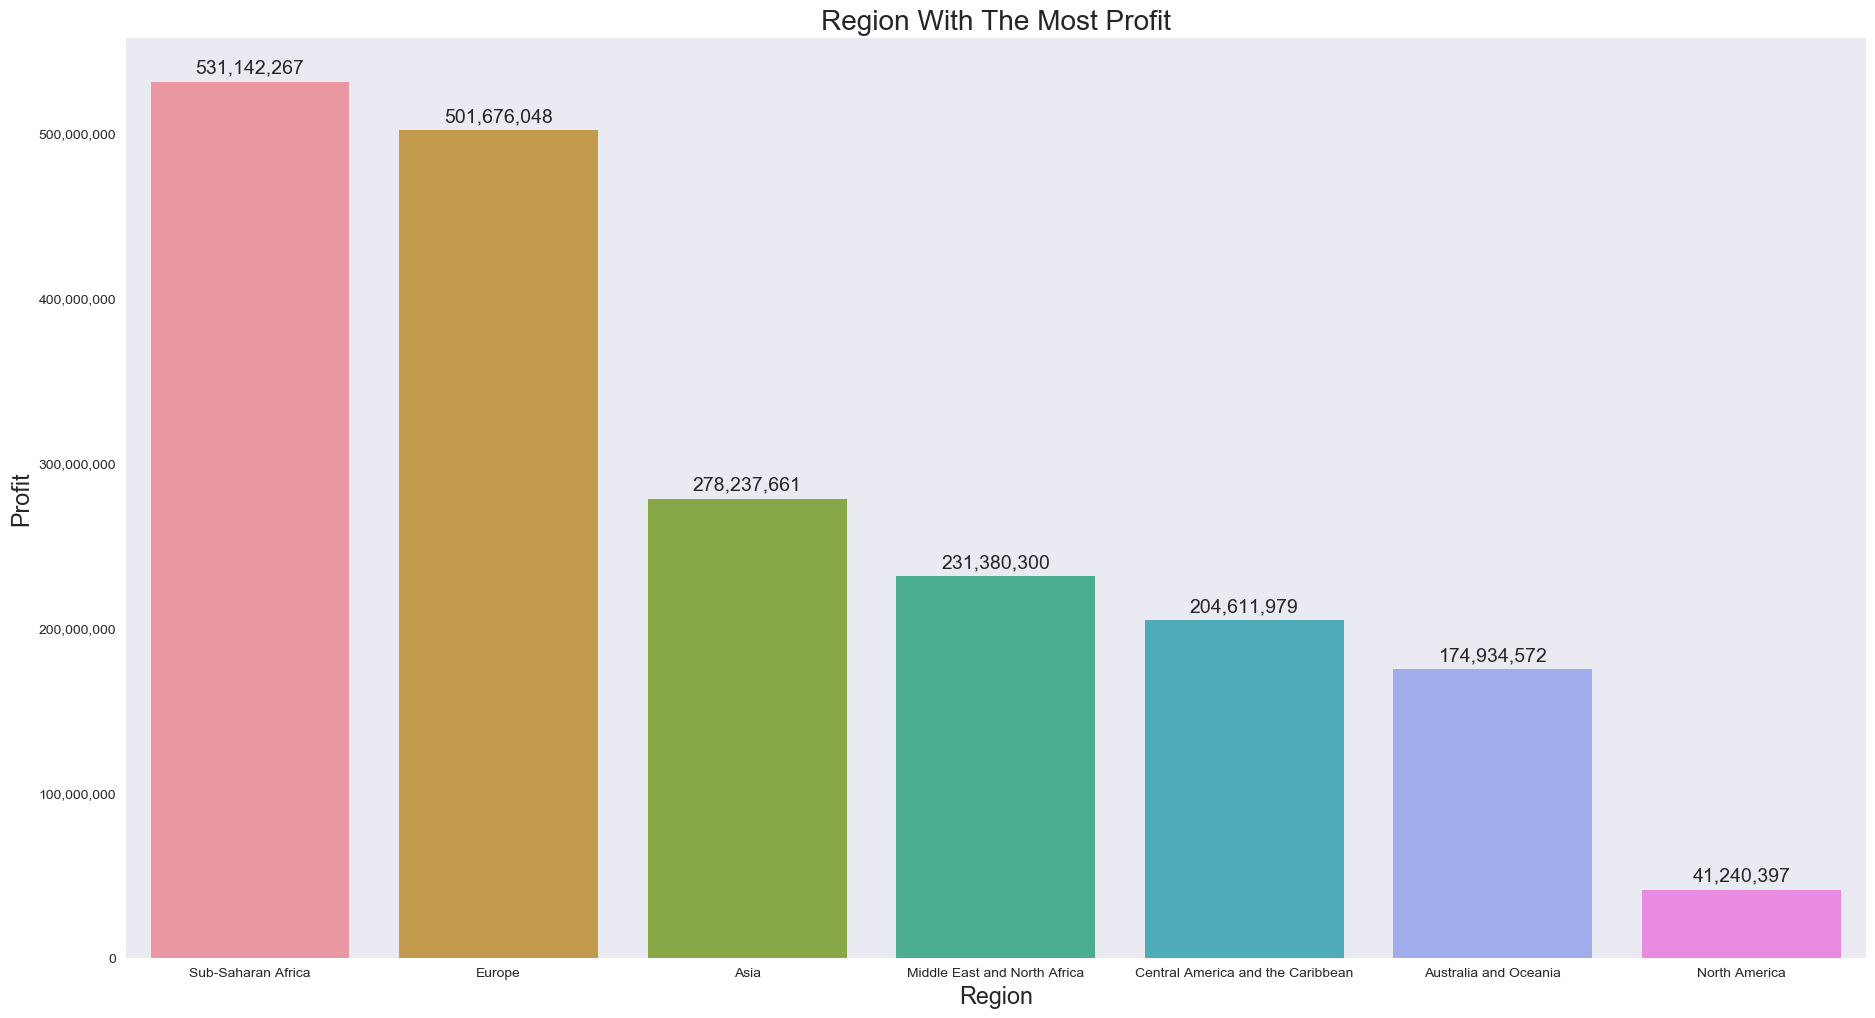

In [155]:
# To visulaize the region that made the most profit
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Region', y='Profit', data=region_with_the_most_profit, order=region_with_the_most_profit['Region'].value_counts().index)
plt.title('Region With The Most Profit')

# Format the profit labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: locale.format_string('%d', x, grouping=True)))

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(locale.format_string('%d', p.get_height(), grouping=True), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


# How to get the percentage profit margin for the item type

In [16]:
# Profit_margin(%) = (Total profit/Total Revenue) *100
# Now using pandas to calcualte it

In [17]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Profit', 'days to ship'],
      dtype='object')

In [57]:
df['Profit Margin'] = (df['Profit'] / df['Total Revenue']) * 100
df['Profit Margin']

0       37.550924
1       36.138419
2       33.003161
3       43.067574
4       36.138419
          ...    
4995    24.799856
4996    67.203514
4997    37.550924
4998    67.203514
4999    40.977541
Name: Profit Margin, Length: 5000, dtype: float64

In [64]:
profit_margin_by_item_type = df.groupby('Item Type')[['Profit Margin']].sum().sort_values(by = 'Profit Margin', ascending = False).reset_index(drop = False)
profit_margin_by_item_type

,Item Type,Profit Margin
0,Clothes,25940.556369
1,Cosmetics,16862.049405
2,Vegetables,16800.791899
3,Baby Food,16710.161391
4,Cereal,16581.016043
5,Beverages,14752.413066
6,Snacks,14383.090838
7,Personal Care,12724.703291
8,Fruits,11546.302251
9,Household,10515.139090


In [65]:
profit_margin_by_item_type.columns

Index(['Item Type', 'Profit Margin'], dtype='object')

# Visulaizing the Profit Margin by Item Type

In [139]:
plt.style.use('seaborn-v0_8-dark')

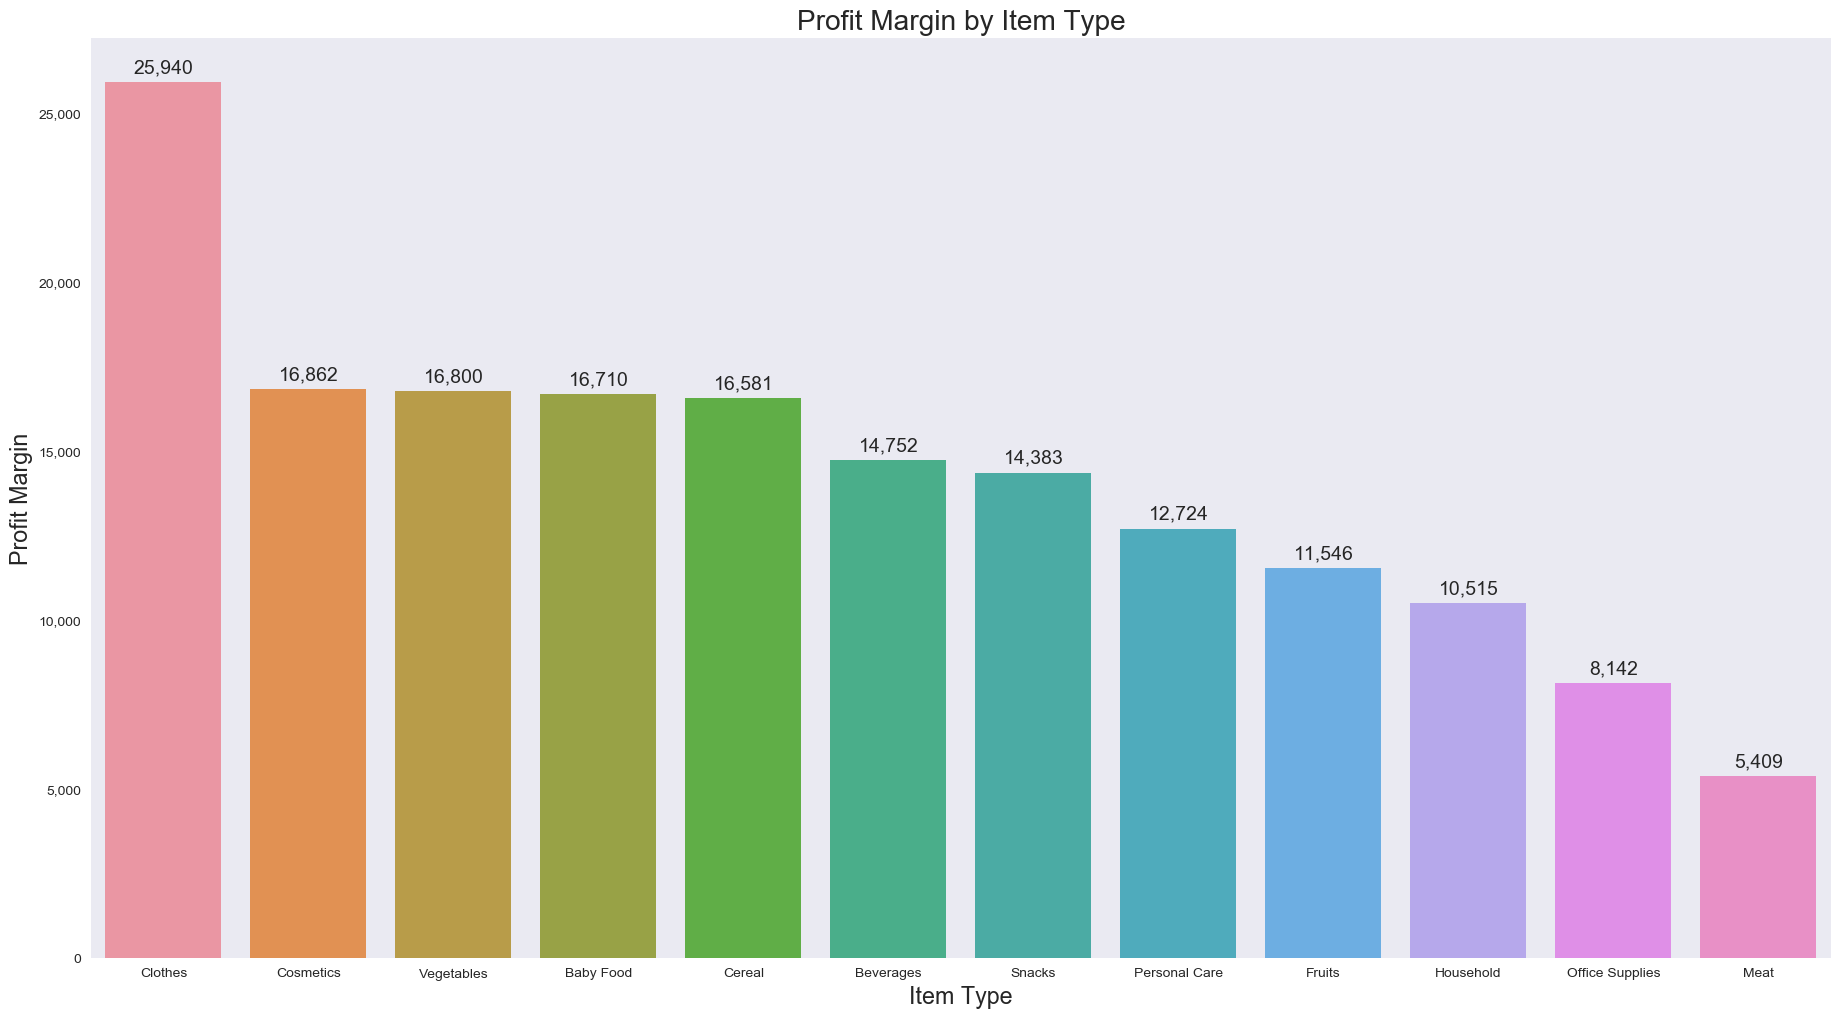

In [149]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Item Type', y='Profit Margin', data=profit_margin_by_item_type, order=profit_margin_by_item_type['Item Type'].value_counts().index)
plt.title('Profit Margin by Item Type')

# Format the profit labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: locale.format_string('%d', x, grouping=True)))

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(locale.format_string('%d', p.get_height(), grouping=True), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


# To get the sum of Profit by Order Priority

In [19]:
Profit_by_order_priority = df.groupby('Order Priority')[['Profit']].sum().sort_values(by = 'Profit', ascending = False).reset_index(drop = False)

In [20]:
Profit_by_order_priority 

,Order Priority,Profit
0,M,5.322906e+08
1,H,5.091578e+08
2,C,4.660857e+08
3,L,4.556891e+08


# What can you derive from the profit of the company from 2010 to date?

In [22]:
# First Filter the dataframe to include only orders from 2010 till date
start_date = '2010-01-01' #start date for the analysis
end_date = pd.Timestamp.now() #current date as the end date
filtered_df = df[(df['Order Date'] >= start_date) & (df['Order Date'] <= end_date)]


In [23]:
# Calcualte the total profit for the period
total_profit = filtered_df['Profit'].sum()

In [24]:
# display the total profit
print(f"The total profit from 2010 to date is: {total_profit}")

The total profit from 2010 to date is: 1963223229.09


In [152]:
profit_trend = filtered_df.groupby(filtered_df['Order Date'++].dt.year)[['Profit']].sum()
profit_trend

,Profit
Order Date,
2010,2.415637e+08
2011,2.583138e+08
2012,2.756606e+08
2013,2.649971e+08
2014,2.564095e+08
2015,2.727459e+08
2016,2.539424e+08
2017,1.395902e+08


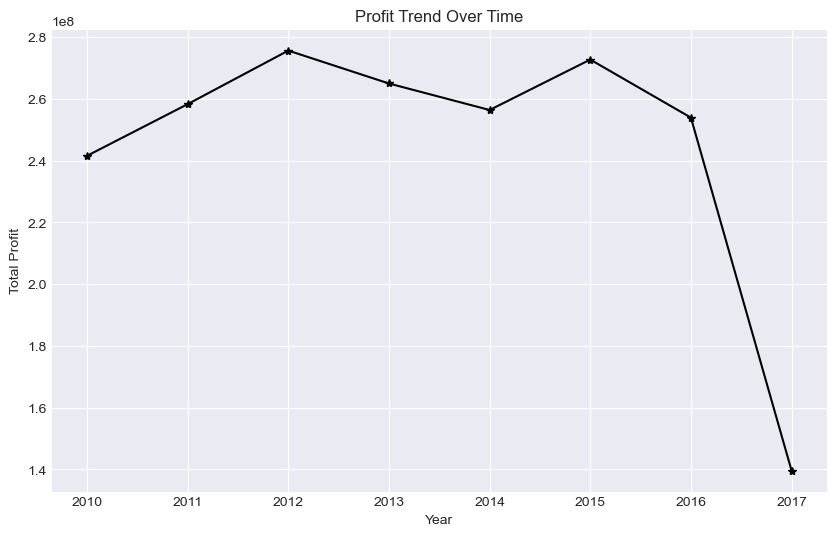

In [26]:
# Plot profit trend over time
profit_trend.plot(kind='line', figsize=(10, 6), marker='*', color='black')
plt.title('Profit Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

In [27]:
# From the analysis above the follwoing conclusion can be drawn 
# !. The year that recorded the lowest profit is 2017 , 
#followed by 2010,2016,2014,2011,2013,2015, with 2012 being the year with the most profit